In [1]:
# import thư viện
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# đọc dữ liệu 
df = pd.read_csv('FoodPrice_in_Turkey.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


#### 1. với mức ý nghĩa 5% kiểm định giả thuyết giá bán gạo trung bình năm 2019 là 10 Lira/kg

In [3]:
#liệt kê tên các sản phẩm
product_names = list(df['ProductName'].unique()) 
print(product_names)

['Rice - Retail', 'Wheat flour - Retail', 'Beans (white) - Retail', 'Potatoes - Retail', 'Eggs - Retail', 'Meat (chicken) - Retail', 'Sugar - Retail', 'Garlic - Retail', 'Lentils - Retail', 'Pasta - Retail', 'Tomatoes - Retail', 'Groundnuts (shelled) - Retail', 'Bread (common) - Retail', 'Coffee - Retail', 'Onions - Retail', 'Tea (green) - Retail', 'Cabbage - Retail', 'Meat (mutton) - Retail', 'Oil (sunflower) - Retail', 'Salt - Retail', 'Coffee (instant) - Retail', 'Peas (green, dry) - Retail', 'Apples (red) - Retail', 'Cauliflower - Retail', 'Cucumbers (greenhouse) - Retail', 'Oil (olive) - Retail', 'Chickpeas - Retail', 'Bananas - Retail', 'Bulgur - Retail', 'Tea - Retail', 'Fuel (petrol-gasoline) - Retail', 'Transport (public) - Retail', 'Tomatoes (paste) - Retail', 'Fuel (gas) - Retail', 'Apples - Retail', 'Oranges - Retail', 'Yogurt - Retail', 'Bread (pita) - Retail', 'Cucumbers - Retail', 'Fish (fresh) - Retail', 'Spinach - Retail', 'Cheese - Retail', 'Meat (veal) - Retail', 'Eg

In [4]:
# Lọc những bản ghi liên quan tới giá gạo năm 2019
df_rice = df.loc[(df.ProductName== 'Rice - Retail') & (df.Year == 2019)]
print ('Số lượng bản ghi của gạo năm 2019: ' +str(df_rice.shape[0])) 

Số lượng bản ghi của gạo năm 2019: 48


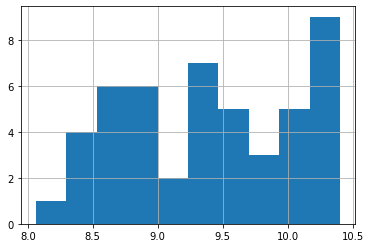

In [5]:
df_rice.Price.hist();

##### Do phân bố có xu hướng gần giống phân bố chuẩn, nên lựa chọn thực hiện kiểm định 2 phía với one sample T test
Giả thuyết không: Giá gạo trung bình = 9.5
Giả thuyết đối: Giá gạo trung bình # 9.5

In [6]:
print( stats.ttest_1samp(df_rice.Price, 9.5))

Ttest_1sampResult(statistic=-1.1854023812590566, pvalue=0.24181730968913567)


##### Giá trị pvalue >5% nên không đủ cơ sở để để bác bỏ giả thuyết không
Kết luận: Với mức ý nghĩa 5% có thể nhận định giá gạo trung bình bằng 9.5 Lira/kg

#### 2. Với mức ý nghĩa 5% hãy kiểm định giả thuyết: Giá bột mỳ và giá gạo ở Turkey năm 2019 là bằng nhau

Số lượng bản ghi của bột mỳ năm 2019: 48


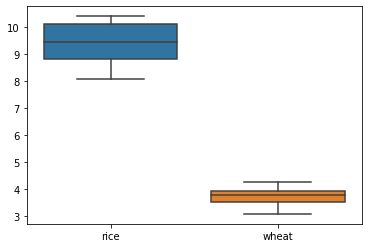

In [7]:
# lấy thông tin bột mỳ năm 2019
df_wheat = df.loc[(df.ProductName== 'Wheat flour - Retail') & (df.Year == 2019)]
print ('Số lượng bản ghi của bột mỳ năm 2019: '+str(df_wheat.shape[0])) 
import seaborn as sns
# Tạo boxplot so sánh phân bố của bột mỳ vào gao
price = {'rice': list(df_rice["Price"]), 'wheat': list(df_wheat['Price'])}
df_price = pd.DataFrame(price)
sns.boxplot(data=df_price)
plt.show()

##### Nhìn vào phân bố trên chúng ta cũng có thể kết luận được luôn, giá của bột mì thấp hơn hẳn giá của gạo. Để chứng minh nhận định rằng giá bột mỳ và giá gạo không giống nhau, chúng ta thực hiện so sánh trung bình độc lập – independent T test Giả thuyết không: giá bột mỳ trung bình bằng giá gạo Giả thuyết đối: giá bột mỳ trung bình khác giá gạo

In [8]:
print(stats.ttest_ind(price['rice'], price['wheat'], equal_var=False))

Ttest_indResult(statistic=53.7516920363042, pvalue=7.11046528586048e-55)


##### Chúng ta có thể thấy Pvalue = 7.1.10^-55 <<5%, bác bỏ giả thuyết không, chấp nhận giả thuyết đối
Kết luận: giá bột mỳ và giá gạo trung bình năm 2019 là khác nhau

#### 3. Vẽ biểu đồ sự biến đổi giá gạo trung bình từ năm 1/2014 đến năm 1/2019 và tìm mối liên hệ giữa giá Trà và giá Cà phê

In [9]:
# xóa những biến không cần thiết
del (df_rice, df_price, df_wheat, price)

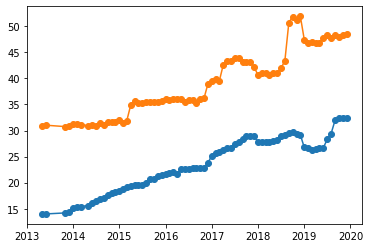

In [10]:
# chuyển đổi dữ liệu ngày tháng
df['time'] =  pd.to_datetime(df['Year'].astype(str) + '/'+df['Month'].astype(str))
# thực hiện tính toán và vẽ giá trà, caffe theo tháng
df_Tea_all = df.loc[(df.ProductName == 'Tea - Retail')]
df_Tea_all_mean_by_month = df_Tea_all.groupby('time')['Price'].mean()
plt.plot_date(df_Tea_all_mean_by_month.index, df_Tea_all_mean_by_month.values, linestyle ='solid')

df_Coffee_all = df.loc[(df.ProductName == 'Coffee - Retail')]
df_Coffee_all_mean_by_month = df_Coffee_all.groupby('time')['Price'].mean()
plt.plot_date(df_Coffee_all_mean_by_month.index, df_Coffee_all_mean_by_month.values, linestyle ='solid')

##### biến đổi dữ liệu: Để tiến hành so sánh được giá trà và giá caphe có chênh nhau không, chúng ta cần so sánh sự khác biệt giữa giá trà và giá cà phê theo cùng thời gian và địa điểm

In [11]:
# Tiền xử lý dữ liệu
# Tạo một data frame thông tin gồm chứa time - place, giá trà, giá cafe
df_tea_and_coffee = df.loc[(df.ProductName.isin(['Tea - Retail','Coffee - Retail']))]

df_tea_and_coffee['time-place'] = df_tea_and_coffee['time'].astype(str) +'-'+df_tea_and_coffee['Place']
df1 = df_tea_and_coffee[df_tea_and_coffee.ProductName =='Tea - Retail'].filter(['time-place',  'Price'])
df1 = df1.rename(columns = {'Price':'Tea - Retail'})

df2 = df_tea_and_coffee[df_tea_and_coffee.ProductName =='Coffee - Retail'].filter(['time-place', 'Price'])
df2 = df2.rename(columns = {'Price':'Coffee - Retail'})

Processed_data = pd.merge(df1, df2, on = 'time-place')
Processed_data.head()

C:\Users\Admin\AppData\Local\Temp/ipykernel_11748/3327696158.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tea_and_coffee['time-place'] = df_tea_and_coffee['time'].astype(str) +'-'+df_tea_and_coffee['Place']


,time-place,Tea - Retail,Coffee - Retail
0,2013-05-01-National Average,14.0201,30.8937
1,2013-06-01-National Average,14.0003,31.0164
2,2013-11-01-National Average,14.1921,30.7445
3,2013-12-01-National Average,14.3991,30.9079
4,2014-01-01-National Average,15.2072,31.2607


##### Tiến hành kiểm định: Thực hiện kiểm định wilcoxon 1 phía với giả thuyết như sau
Giả thuyết không: giá cà phê bằng giá trà công thêm 15 Lira ở mọi thời điểm
Giả thuyết đối: Giá giá cà phê luôn hơn giá trà 15 Lira ở mọi thời điểm

In [12]:
# thực hiện biến đổi dữ liệu
d = Processed_data['Coffee - Retail']-Processed_data['Tea - Retail'] - 15
# Thực hiện kiểm định wilcolxon
from scipy import stats
# thực hiện kiểm định với giả thuyết đối được định nghĩa ở trên
stats.wilcoxon(d, alternative='greater')

WilcoxonResult(statistic=9838.0, pvalue=0.0004122034397612688)

##### Do pvalue <1% rất nhiều –> Bác bỏ giả thuyết không, chấp nhận giả thuyết đối Giá Cà phê luôn lớn hơn giá trà ít nhất 15 lira mà không bị ảnh hưởng bởi thời gian hay địa điểm